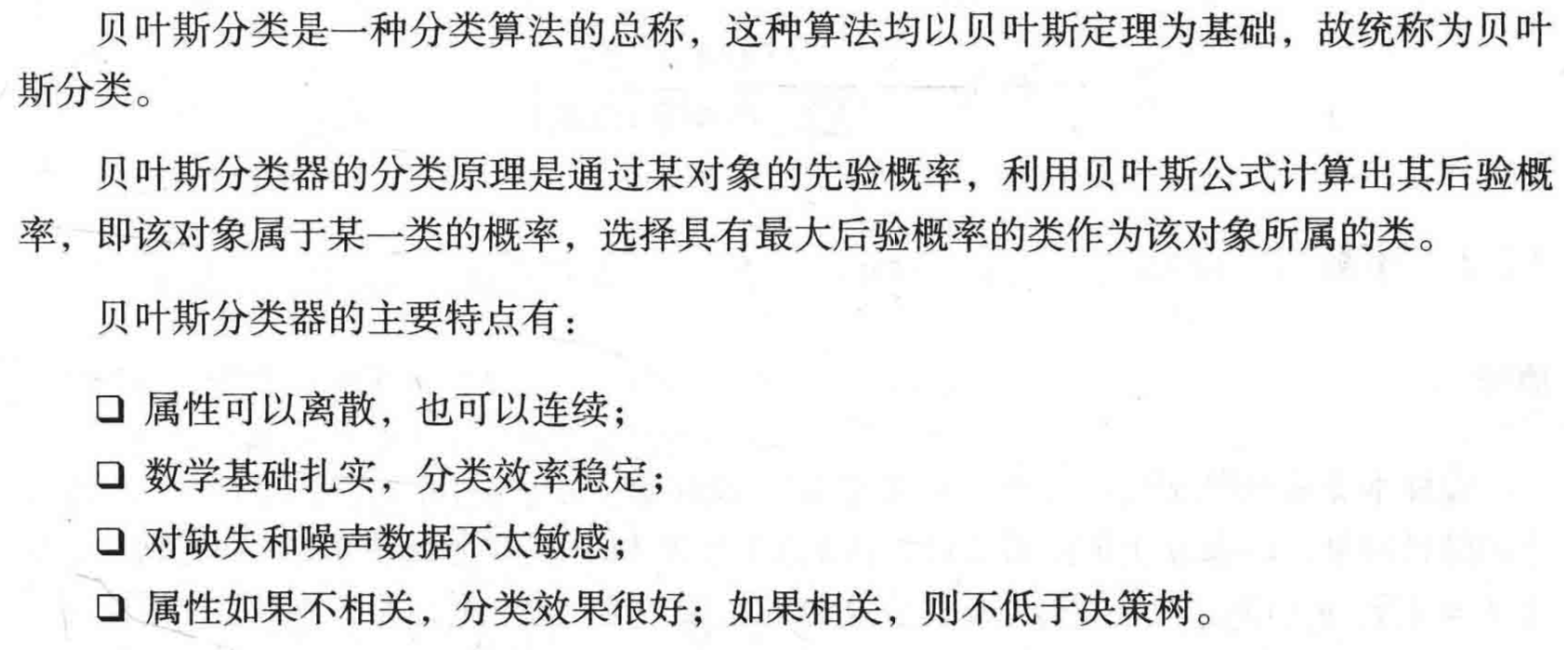

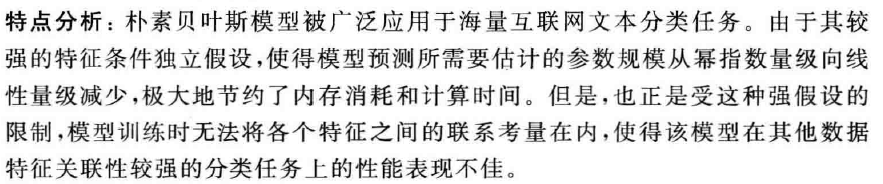

In [1]:
from sklearn import naive_bayes

/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [10]:
from sklearn.datasets import fetch_20newsgroups  # 从sklearn.datasets里导入新闻数据抓取器 fetch_20newsgroups
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.naive_bayes import MultinomialNB, GaussianNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report

# 数据获取
例子：新闻分类

数据：18846条新闻，标签为0-19个数字，一共20类。

In [4]:
news = fetch_20newsgroups(subset='all')
print(len(news.data))  # 输出数据的条数：18846

18846


In [6]:
#2.数据预处理：训练集和测试集分割，文本特征向量化
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=14) # 随机采样25%的数据样本作为测试集
print (X_train[0])  #查看训练样本
print (y_train[0:100])  #查看标签

From: joslin@pogo.isp.pitt.edu (David Joslin)
Subject: Re: Silence is concurance
Distribution: usa
Organization: Intelligent Systems Program
Lines: 80

For those missing the context of this thrilling discussion between
Jim and I, Jim wrote the following to me in e-mail after I pointed out
that he (Jim) had taken a quote out of context:
>In t.r.m. Robert Weiss writes [a promise from Psalm 9:10]
>Gee, since you wouldn't be at all hypocritical, you must be really
>busy arguing against these out-of-context extracted translations!

He directed a similar accusation of hypocrisy, again based on a lack of
response to an article by Robert Weiss, toward Stephen.

I pointed out that I did, in fact, agree that both Robert Weiss and
Jim Meritt took quotes out of context.  Hence, I find it difficult to
understand why Jim thinks I am a hypocrite.  Needless to say, I don't
have time to reply to *every* article on t.r.m. that takes a quote
out of context.  

I asked Jim the following:
>}So, according t

In [7]:
#文本特征向量化
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# 使用朴素贝叶斯MultinomialNB进行训练

In [8]:
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
mnb.fit(X_train,y_train)    # 利用训练数据对模型参数进行估计
y_predict = mnb.predict(X_test)     # 对参数进行预测

In [9]:
#4.获取结果报告
print ('The Accuracy of Naive Bayes Classifier is:', mnb.score(X_test,y_test))
print (classification_report(y_test, y_predict, target_names = news.target_names))

The Accuracy of Naive Bayes Classifier is: 0.8404074702886248
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.88      0.87       205
           comp.graphics       0.63      0.87      0.73       254
 comp.os.ms-windows.misc       0.97      0.12      0.22       253
comp.sys.ibm.pc.hardware       0.55      0.85      0.67       226
   comp.sys.mac.hardware       0.96      0.77      0.85       272
          comp.windows.x       0.80      0.90      0.84       238
            misc.forsale       0.93      0.73      0.82       248
               rec.autos       0.89      0.92      0.90       233
         rec.motorcycles       0.96      0.95      0.96       248
      rec.sport.baseball       0.97      0.96      0.97       236
        rec.sport.hockey       0.96      0.97      0.96       240
               sci.crypt       0.83      0.95      0.89       243
         sci.electronics       0.87      0.79      0.83       240
             

# 使用朴素贝叶斯GaussianNB进行训练

In [13]:
gnb = GaussianNB()   # 使用默认配置初始化朴素贝叶斯
gnb.fit(X_train.toarray(),y_train)    # 利用训练数据对模型参数进行估计

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [14]:
y_predict = gnb.predict(X_test.toarray())     # 对参数进行预测
#4.获取结果报告
print ('The Accuracy of Naive Bayes Classifier is:', gnb.score(X_test,y_test))
print (classification_report(y_test, y_predict, target_names = news.target_names))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.